<a href="https://colab.research.google.com/github/harshita0212/ChurnModelling-/blob/main/PlantDisease_Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
!pip install kaggle

In [5]:
kaggle_credentails = json.load(open("kaggle.json"))

In [6]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:57<00:00, 21.8MB/s]
100% 2.04G/2.04G [01:57<00:00, 18.6MB/s]


In [8]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [9]:
with  ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
   zip_ref.extractall()

In [10]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'segmented', 'grayscale']
38
['Tomato___Early_blight', 'Potato___healthy', 'Apple___Cedar_apple_rust', 'Strawberry___healthy', 'Cherry_(including_sour)___healthy']
38
['Tomato___Early_blight', 'Potato___healthy', 'Apple___Cedar_apple_rust', 'Strawberry___healthy', 'Cherry_(including_sour)___healthy']
38
['Tomato___Early_blight', 'Potato___healthy', 'Apple___Cedar_apple_rust', 'Strawberry___healthy', 'Cherry_(including_sour)___healthy']


In [11]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['11c32403-6d55-4f16-8c16-fae9c04a9920___Mt.N.V_HL 9008.JPG', 'bc9f03e8-d545-4ba9-a68d-7032b3c36670___Mt.N.V_HL 6075.JPG', 'b2de09b2-4c5d-4be5-a06f-27419db0f696___Mt.N.V_HL 6097.JPG', '6dc550f9-1939-4184-8efd-4afd6508ae3c___Mt.N.V_HL 9026.JPG', '8253f8a0-545c-4020-babf-46abad8260cf___Mt.N.V_HL 6161.JPG']


**Data Prerocessing**

In [12]:
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


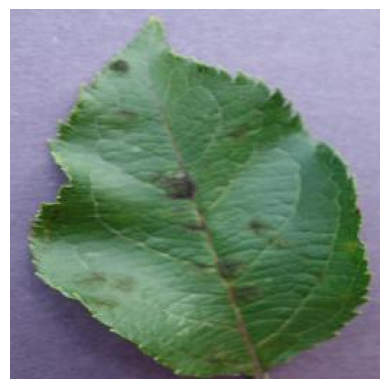

In [13]:
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

img = mpimg.imread(image_path)

print(img.shape)
#display the image
plt.imshow(img)
plt.axis('off')
plt.show()


In [14]:
img_size = 224
batch_size = 32 #each batch has 32 images

**Train Test Split**

In [15]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 #use 20% of data for validation
)

In [16]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.


In [17]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**CNN**

In [20]:
#model definition

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))#output layer - returns the number of classes present in the datastet


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size, #number of steps per epoch
    epochs = 5, #number of epochs
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size #validation steps
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 139s 97ms/step - accuracy: 0.5729 - loss: 1.8883 - val_accuracy: 0.8464 - val_loss: 0.4848
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.6664
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 96s 70ms/step - accuracy: 0.8932 - loss: 0.3350 - val_accuracy: 0.8668 - val_loss: 0.4413
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.0610e-05
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 93s 68ms/step - accuracy: 0.9581 - loss: 0.1345 - val_accuracy: 0.8714 - val_loss: 0.4813


**Model Evaluation**

In [24]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")




Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.8728 - loss: 0.4797
Validation Accuracy: 87.13%


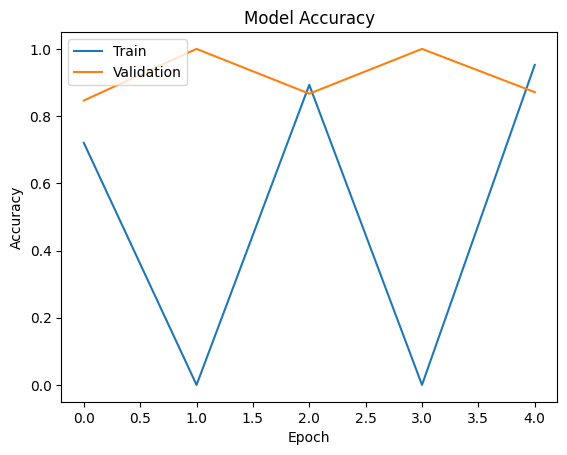

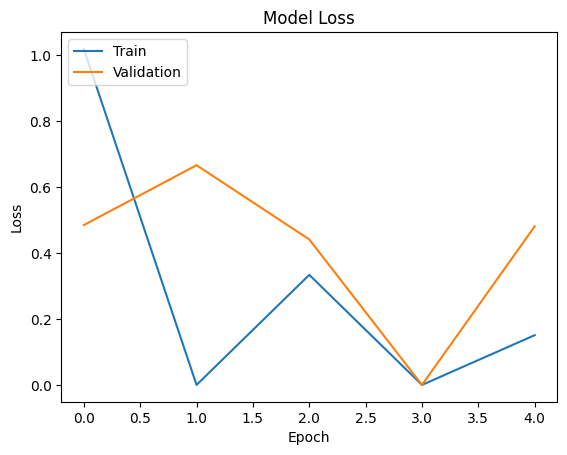

In [25]:
#plot training & valdation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()